In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

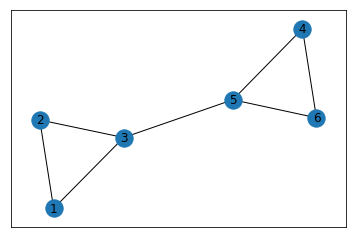

In [11]:
fig, ax = plt.subplots()
# ax.axis('off')
G = nx.Graph()  # an undirected graph object

for i in range(6): G.add_node(i + 1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 4)
G.add_edge(3, 5)
spring_layout_for_G = nx.spring_layout(G, seed=100) # position of nodes not random
nx.draw_networkx(G, pos=spring_layout_for_G)
fig.savefig('./plots/Simple_pagerank_G.png', format='PNG')

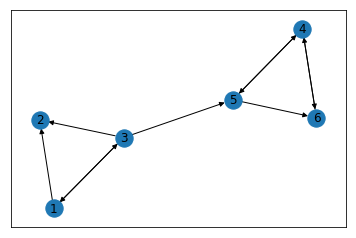

In [12]:
fig2, ax = plt.subplots()
# ax.axis('off')
G = nx.DiGraph()  # a directed graph object
for i in range(6): G.add_node(i + 1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 4)
G.add_edge(3, 5)
nx.draw_networkx(G, pos=spring_layout_for_G)
fig2.savefig('./plots/Simple_pagerank_DiGraph.png', format='PNG')

In [27]:
adj_matrix = nx.adjacency_matrix(G)
adj_matrix

<6x6 sparse matrix of type '<class 'numpy.intc'>'
	with 10 stored elements in Compressed Sparse Row format>

In [28]:
adj_matrix.todense()

matrix([[0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0]], dtype=int32)

In [29]:
H = nx.adjacency_matrix(G).astype(float)
out_degree_for_nodes_of_G = G.out_degree
for i, j in zip(H.nonzero()[0], H.nonzero()[1]):
    try:
        H[i, j] = 1. / out_degree_for_nodes_of_G[i + 1]
    except ZeroDivisionError:
        print("non zero elements appear to be zero")
H

<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [30]:
H.todense()

matrix([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.5       ,
         0.5       ],
        [0.        , 0.        , 0.        , 0.5       , 0.        ,
         0.5       ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]])

In [49]:
pi0 = H.shape[0]*[1/H.shape[0]]
pi0 = np.array(pi0)
pi0

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [50]:
pi0.shape

(6,)

In [51]:
H.shape

(6, 6)

In [52]:
# iteration 1
np.matmul(pi0,H.todense())

matrix([[0.05555556, 0.13888889, 0.08333333, 0.25      , 0.13888889,
         0.16666667]])

In [53]:
# iteration 2
np.matmul(np.matmul(pi0,H.todense()), H.todense())

matrix([[0.02777778, 0.05555556, 0.02777778, 0.23611111, 0.15277778,
         0.19444444]])

In [66]:
pi0 = H.shape[0]*[1/H.shape[0]] # elements 1/n
pi0 = np.array(pi0)
print('iteration: 0\n', pi0)
print('\n')
for i in range(20):
    pi_new = np.matmul(pi0,H.todense())
    print(f'iteration: {i+1}\n', pi_new)
    print('\n')
    pi0 = pi_new

iteration: 0
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


iteration: 1
 [[0.05555556 0.13888889 0.08333333 0.25       0.13888889 0.16666667]]


iteration: 2
 [[0.02777778 0.05555556 0.02777778 0.23611111 0.15277778 0.19444444]]


iteration: 3
 [[0.00925926 0.02314815 0.01388889 0.27083333 0.12731481 0.19444444]]


iteration: 4
 [[0.00462963 0.00925926 0.00462963 0.25810185 0.1400463  0.19907407]]


iteration: 5
 [[0.00154321 0.00385802 0.00231481 0.26909722 0.13059414 0.19907407]]


iteration: 6
 [[0.0007716  0.00154321 0.0007716  0.26437114 0.13532022 0.19984568]]


iteration: 7
 [[2.57201646e-04 6.43004115e-04 3.85802469e-04 2.67505787e-01
  1.32442773e-01 1.99845679e-01]]


iteration: 8
 [[1.28600823e-04 2.57201646e-04 1.28600823e-04 2.66067065e-01
  1.33881494e-01 1.99974280e-01]]


iteration: 9
 [[4.28669410e-05 1.07167353e-04 6.43004115e-05 2.66915027e-01
  1.33076400e-01 1.99974280e-01]]


iteration: 10
 [[2.14334705e-05 4.28669410e-05 2.14334705e-05 2.

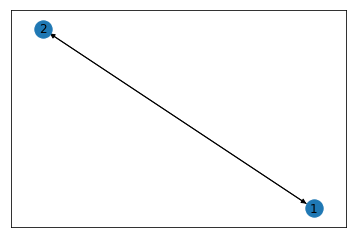

In [73]:
# Cycles
fig, ax = plt.subplots()
# ax.axis('off')
G = nx.DiGraph()  # an undirected graph object

G.add_node(1)
G.add_node(2)

G.add_edge(1, 2)
G.add_edge(2, 1)
spring_layout_for_G = nx.spring_layout(G, seed=100) # position of nodes not random
nx.draw_networkx(G, pos=spring_layout_for_G)
# fig.savefig('./plots/Simple_pagerank_G.png', format='PNG')

In [76]:
H = nx.adjacency_matrix(G).astype(float)
out_degree_for_nodes_of_G = G.out_degree
for i, j in zip(H.nonzero()[0], H.nonzero()[1]):
    try:
        H[i, j] = 1. / out_degree_for_nodes_of_G[i + 1]
    except ZeroDivisionError:
        print("non zero elements appear to be zero")
H

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [77]:
H.todense()

matrix([[0., 1.],
        [1., 0.]])

In [83]:
pi0 = H.shape[0]*[1/H.shape[0]] # elements 1/n
pi0 = np.array(pi0)
print('iteration: 0\n', pi0)
print('\n')
for i in range(4):
    pi_new = np.matmul(pi0,H.todense())
    print(f'iteration: {i+1}\n', pi_new)
    print('\n')
    pi0 = pi_new

iteration: 0
 [0.5 0.5]


iteration: 1
 [[0.5 0.5]]


iteration: 2
 [[0.5 0.5]]


iteration: 3
 [[0.5 0.5]]


iteration: 4
 [[0.5 0.5]]




In [84]:
pi0 = np.array([0, 1.])
print('iteration: 0\n', pi0)
print('\n')
for i in range(6):
    pi_new = np.matmul(pi0,H.todense())
    print(f'iteration: {i+1}\n', pi_new)
    print('\n')
    pi0 = pi_new

iteration: 0
 [0. 1.]


iteration: 1
 [[1. 0.]]


iteration: 2
 [[0. 1.]]


iteration: 3
 [[1. 0.]]


iteration: 4
 [[0. 1.]]


iteration: 5
 [[1. 0.]]


iteration: 6
 [[0. 1.]]


